Anna Mándoki, 5<sup>th</sup> April 2023

# Certified B Corporations

## Summary

The purpose of this project is to explore a dataset about Certified B Corporations to evaluate data quality, perform data cleaning and create visualizations using the main Python libraries: NumPy, pandas, matplotlib and seaborn.

The dataset contains information on certified B corporations, such as the name and ID of the company, location where it operates, industry, size, certification date and scores across the different impact areas.

## About Certified B Corporations

B = beneficial

**Certified B Corporations are companies that meet the highest standards of verified social and environmental performance, transparency and accountability.**

The B Corp certification is a private certification issued by non-profit organization B Lab, that measures a company's social and environmental impact. In order to achieve the certification, a company must reach a total score of 80 or above on the B Impact Assessment. The assessment consists of around 200 questions about the company's practices and outputs across five categories: governance, workers, community, environment, and customers.

Today, there are more than 6,000 Certified B Corps located all around the world and across various industries.

For further information on the certification, see [Project Description and Notes](https://github.com/zhaw-education/student-repo-2023r1-annamandoki/blob/main/project/B_Corp_Project_Description_Notes.md)

## About the data

The data is owned by B Lab and was created using the companies' results on the B Impact Assessment. The participating companies agree to make the information about their performance measured against B Lab’s standards publicly available on their B Corp profile on B Lab’s website.

The raw data is made available by B Lab on *data.world*. The dataset is called *B Corp Impact data* and it can be downloaded in .csv format or can be used to run queries on using data.world's built-in query tool. For this project I used the query tool to create an extract of the original dataset and to read it directly from data.world. (See code below)

The dataset was last updated on the 29<sup>th</sup> March 2023. B Lab update the data on a quarterly basis. When I started to work on this project, I used the latest version as of 23<sup>rd</sup> December 2022 and updated my query and the extract dataset once the new version became available.

The dataset contains information on company characteristics (name, ID, country where it operates), certification dates, scores etc. The full data dictionary can be found in the  [Project Description and Notes](https://github.com/zhaw-education/student-repo-2023r1-annamandoki/blob/main/project/B_Corp_Project_Description_Notes.md)

### My query on data.world

I used the below query to narrow down the original dataset by excluding de-certified companies and values I don't intend to use in this project.

```sql
SELECT company_id, company_name, date_first_certified, date_certified, industry, industry_category,
    country, state, city, sector, size, overall_score, 
    impact_area_community, impact_area_customers, impact_area_environment, impact_area_governance,
    impact_area_workers, impact_area_community_na_score, impact_area_customers_na_score,
    impact_area_environment_na_score, impact_area_governance_na_score, impact_area_workers_na_score
FROM b_corp_impact_data
WHERE current_status = 'certified'
AND certification_cycle = 1
```

## Import the necessary libraries and read the dataset

### Importing libraries

In [1]:
from datetime import date, datetime # to parse dates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.edgecolor": "grey"}
sns.set_theme(style = "ticks", rc = custom_params) # to customize plots
pd.set_option("max_columns", 50) # to be able to see all the columns

### Read query result from *data.world*

I am going to create data frame 'bcorp_df' and read the .csv file by linking directly to my query result saved on data.world. I already know there are two columns containing date and datetime info, so I parse these as I am reading in the file.

In [2]:
bcorp_df = pd.read_csv("https://query.data.world/s/i3aoh6c6s46favvd3huje6ohscesni?dws=00000", parse_dates = ["date_first_certified", "date_certified"])

## Exploratory Data Analysis (EDA)

### Intentions for this section

Get a general sense about the dataset.
- Size of the dataset
- Data types
- Check first/last few rows, get a random sample

### First look at the data

In [3]:
# number of columns and rows
bcorp_df.shape

(6130, 22)

In [4]:
# column names, dtypes, hint on null values
bcorp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6130 entries, 0 to 6129
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   company_id                        6130 non-null   object             
 1   company_name                      6130 non-null   object             
 2   date_first_certified              6130 non-null   datetime64[ns]     
 3   date_certified                    6130 non-null   datetime64[ns, UTC]
 4   industry                          6130 non-null   object             
 5   industry_category                 6130 non-null   object             
 6   country                           6130 non-null   object             
 7   state                             6125 non-null   object             
 8   city                              6128 non-null   object             
 9   sector                            6130 non-null   object       

In [5]:
# get the first 5 rows
bcorp_df.head()

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
0,001C000001gialIIAQ,Design Force,2022-11-16,2022-11-16 05:33:20.831000+00:00,Management consultant - for-profits,Professional & technical services,United States,District of Columbia,Washington,Service with Minor Environmental Footprint,1-9,81.9,20.8,3.1,10.9,16.2,29.5,0.0,0.0,0.0,0.0,1.1
1,0013b00001zWk0BAAS,PAD studio Ltd,2023-01-16,2023-01-16 13:07:41.005000+00:00,Architecture design & planning,"Real estate, design & building",United Kingdom,Hampshire,Lymington,Service with Minor Environmental Footprint,1-9,88.4,14.4,4.0,27.0,17.0,23.7,0.0,0.0,0.0,0.0,2.1
2,001C000001R14xsIAB,Damasco,2017-09-27,2022-10-17 17:09:22.217000+00:00,Management consultant - for-profits,Professional & technical services,Argentina,Autonomous City Of Buenos Aires,Ciudad Autónoma de Buenos Aires,Service with Minor Environmental Footprint,0,83.4,36.4,21.9,7.8,12.1,NaN,0.0,0.7,4.3,0.0,NaN
3,0013b00001tBW6yAAG,Danone Specialised Nutrition UK & Ireland,2022-01-14,2022-01-14 08:38:51.549000+00:00,Food products,Manufactured Goods,United Kingdom,London Borough of Hounslow,London,Manufacturing,1000+,90.2,17.0,9.5,16.0,16.8,29.1,0.0,0.0,0.3,0.0,1.1
4,001C000001SGy9vIAD,TEN OVER STUDIO,2017-09-28,2022-10-18 17:47:08.735000+00:00,Architecture design & planning,"Real estate, design & building",United States,California,San Luis Obispo,Service with Minor Environmental Footprint,10-49,109.2,25.2,2.1,26.5,19.6,31.9,3.0,0.7,0.0,0.0,0.0


In [6]:
# get the last 5 rows
bcorp_df.tail()

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
6125,0013b00001twU7xAAE,The Wellbeing Farm Ltd,2022-03-22,2022-03-22 08:24:35.078000+00:00,Event catering & related,Accommodation & food service,United Kingdom,Lancashire,Bolton,Service with Significant Environmental Footprint,10-49,97.6,28.3,3.6,18.6,17.4,25.1,2.6,0.0,1.3,0.0,0.5
6126,0013b00001vPBHJAA4,iilo Creative Alliance inc.,2023-03-22,2023-03-23 14:17:43.410000+00:00,Other info service activities,"Information, communication & technology",Canada,British Columbia,Nanaimo,Service with Minor Environmental Footprint,0,105.3,48.6,23.8,5.0,17.8,NaN,5.7,0.0,4.2,0.0,NaN
6127,001C000001iuuboIAA,Factors Group Australia,2019-05-13,2023-03-29 04:12:44.429000+00:00,Pharmaceutical products,Wholesale,Australia,New South Wales,"Rydalmere, Sydney",Wholesale/Retail,10-49,98.2,18.4,11.0,19.4,16.5,25.5,3.2,0.0,0.0,0.0,3.9
6128,0013b00001p33OEAAY,Portas Agency Ltd,2022-07-28,2022-07-28 13:37:17.593000+00:00,Advertising & market research,Professional & technical services,United Kingdom,London,London,Service with Minor Environmental Footprint,10-49,80.6,18.3,3.0,7.6,19.0,28.0,2.5,0.0,0.6,0.0,1.3
6129,0013b00001s7pU9AAI,Engage Interactive,2021-05-07,2021-05-07 16:40:34.403000+00:00,Advertising & market research,Professional & technical services,United Kingdom,Leeds,Leeds,Service with Minor Environmental Footprint,10-49,88.5,26.7,3.9,6.2,17.4,31.0,0.0,0.0,0.5,0.0,2.5


In [7]:
# get a random sample of 10 rows
bcorp_df.sample(10)

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
1477,001C000001cjehGIAQ,hudi,2019-02-04,2019-02-04 00:00:00+00:00,Restaurants & food service,Accommodation & food service,France,Île-de-France,NOISY-LE-SEC,Service with Significant Environmental Footprint,1-9,82.6,20.9,NaN,24.7,13.0,22.9,0.0,NaN,0.0,0.0,1.1
890,0013b00001ssKsAAAU,Toynovo,2022-05-18,2022-05-18 17:23:47.564000+00:00,Other recreation,"Arts, entertainment & recreation",Colombia,Cundinamarca Department,Bogota,Service with Significant Environmental Footprint,1-9,92.7,14.5,21.0,16.5,15.7,16.7,3.2,0.0,0.6,0.0,4.3
24,0013b00001qozY8AAI,DIOSA designs Inc.,2022-10-13,2022-10-13 01:16:41.874000+00:00,Leather & related products,Retail,Canada,Newfoundland and Labrador,St. John's,Wholesale/Retail,1-9,83.3,29.0,4.8,15.3,13.9,12.8,3.1,0.0,0.0,0.0,4.2
532,0013b00001qF5G5AAK,Solbayres,2021-11-23,2021-11-23 17:13:53.762000+00:00,Other transport equipment,Transportation & storage,Argentina,Buenos Aires,San Martín,Service with Significant Environmental Footprint,1000+,84.9,17.5,3.3,8.6,16.4,21.8,0.0,0.0,12.1,0.0,4.9
2236,0013b00001vKDkwAAG,012factory Spa Società Benefit,2022-10-30,2022-10-30 03:29:06.356000+00:00,Other business support,Administrative & support services,Italy,Campania,Caserta,Service with Minor Environmental Footprint,1-9,85.9,23.6,3.4,7.2,20.2,20.1,3.2,0.0,0.0,0.0,8.0
5609,001C000001gZvyrIAC,Specialisterne Spain,2018-11-19,2023-03-06 08:47:23.395000+00:00,Other info service activities,"Information, communication & technology",Spain,Catalonia,Sant Cugat del Vallès,Service with Minor Environmental Footprint,50-249,85.3,10.1,4.1,1.1,13.7,51.1,1.4,0.4,1.1,0.0,1.8
5268,0013b00001p2wf3AAA,Greening SpA,2020-07-29,2020-07-29 12:26:16.489000+00:00,Environmental consulting,Professional & technical services,Chile,Bío Bío Region,Concepción,Service with Minor Environmental Footprint,1-9,92.3,17.6,15.8,9.1,17.4,22.6,0.0,0.0,2.5,0.0,7.2
5422,0013b00001yeDyeAAE,You + I (Clever Kombucha Ltd.),2023-03-10,2023-03-10 22:04:18.535000+00:00,Beverages,Manufactured Goods,United Kingdom,Glasgow,Glasgow,Manufacturing,1-9,88.7,13.9,2.0,32.0,13.2,19.9,3.3,0.0,0.9,0.0,3.0
972,0013b00001zJB8XAAW,Cocoliche Ropa Con Otra Oportunidad,2023-01-25,2023-01-25 13:07:40.561000+00:00,Apparel,Retail,Argentina,Buenos Aires Province,La Plata,Wholesale/Retail,10-49,87.4,15.9,1.6,26.8,14.9,15.8,3.6,0.0,1.5,0.0,6.9
551,0013b00001vQHXnAAO,Southbridge,2022-10-20,2022-10-20 20:26:53.800000+00:00,Non-life insurance,Financial & insurance activities,Chile,Santiago Metropolitan Region,Santiago,Service with Minor Environmental Footprint,50-249,87.7,20.9,2.0,9.1,19.6,26.4,0.0,0.2,0.5,0.0,8.7


### Observations after first look
- The data frame consists of 6130 rows ( = 6130 companies) and 22 columns (chosen by me). The previous version contained 5786 rows (=5786 companies) and 22 columns.
- Data types:
    - string for company characteristics
    - datetime (date only and date with timestamp)
    - float for scores
- Category of variables:
    - Nominal data: company name, industry, sector, country, state, city
    - Ordinal data: size (company size groups from 0 to 1000+)
    - Continuous data: all the scores
- All data types are in order: dates are datetime, company information are stings, all the scores are float
- The timestamp part of 'date_certified' is probably not really useful
- Column names look fine, they are in snake case and they are informative.
- Column names 'date_first_certified' and 'date_certified' might be confusing ('date_certified' = the most recent date the company certified as B Corp )
- There are NaN values in columns related to customers and workers scores

### TODO
- Look into the missing values
- Rename 'date_certified' column
- Consider creating columns to help analysis (extract year from date etc)

## Data cleaning and transformation

### Intentions for this section

Make sure the data is clean and consistently organized.
- Save a copy of the original dataset before starting to do any changes
- Check missing values
- Check duplicates
- Check outliers in scores
- Rename 'date_certified' column
- Create additional columns (year only from first certified date)
- Decide if there are any rows that should be removed

### Create backup for the original data frame

In [8]:
# save a copy of bcorp_df into bcorp_backup
bcorp_backup = bcorp_df.copy()

In [9]:
bcorp_backup.shape

(6130, 22)

### Missing values

In [10]:
# summarizing missing values
bcorp_df.isna().sum()

company_id                            0
company_name                          0
date_first_certified                  0
date_certified                        0
industry                              0
industry_category                     0
country                               0
state                                 5
city                                  2
sector                                0
size                                  0
overall_score                         0
impact_area_community                 0
impact_area_customers               166
impact_area_environment               0
impact_area_governance                0
impact_area_workers                 559
impact_area_community_na_score        0
impact_area_customers_na_score      166
impact_area_environment_na_score      0
impact_area_governance_na_score       0
impact_area_workers_na_score        559
dtype: int64

Columns with missing values:
- state: 5
- city: 2
- impact_area_customers: 166
- impact_area_workers: 559
- impact_area_customers_na_score: 166
- impact_area_workers_na_score: 559

#### Missing state

In [11]:
# see rows with missing state
bcorp_df[bcorp_df.state.isna()]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
1826,0013b00001rI2DxAAK,Future Kind,2021-03-29,2021-03-29 14:13:09.211000+00:00,Pharmaceutical products,Retail,Hong Kong S.A.R.,NaN,Hong Kong,Wholesale/Retail,1-9,86.1,11.7,5.0,17.0,17.9,20.7,2.5,0.0,6.4,0.0,4.6
2430,0013b00001o3sUZAAY,Bighams,2020-08-31,2020-08-31 13:14:25.350000+00:00,Food products,Manufactured Goods,United Kingdom,NaN,London,Manufacturing,250-999,83.2,18.0,2.8,20.2,15.6,23.5,1.8,0.0,0.3,0.0,0.7
2712,0013b00001qFRYnAAO,RECIRC,2020-06-18,2020-06-18 16:30:56.387000+00:00,Personal care products,Manufactured Goods,United States,NaN,NaN,Manufacturing,0,97.3,39.4,4.7,24.6,16.7,NaN,8.7,0.0,3.0,0.0,NaN
4004,001C000001njcm9IAA,Octopus Group,2021-02-09,2021-02-01 00:00:00+00:00,Equity investing - Developed Markets,Financial & insurance activities,United Kingdom,NaN,London,Service with Minor Environmental Footprint,250-999,85.4,10.8,23.1,13.5,11.5,26.4,0.4,0.0,2.9,0.0,1.7
4152,001C000001lPVDdIAO,The Co-operative Bank,2021-01-13,2021-01-13 01:36:11.733000+00:00,Deposit bank - Developed Markets,Financial & insurance activities,New Zealand,NaN,Wellington,Service with Minor Environmental Footprint,250-999,88.1,14.3,14.6,8.2,15.5,28.0,2.1,0.8,0.0,0.0,3.7


Missing state is only relevant for US companies. There is only one such company, RECIRC, that has the city missing as well.

#### Missing city

In [12]:
# see rows with missing city
bcorp_df[bcorp_df.city.isna()]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
2712,0013b00001qFRYnAAO,RECIRC,2020-06-18,2020-06-18 16:30:56.387000+00:00,Personal care products,Manufactured Goods,United States,NaN,NaN,Manufacturing,0,97.3,39.4,4.7,24.6,16.7,NaN,8.7,0.0,3.0,0.0,NaN
3976,0013b00001o4GNLAA2,Motivf Corporation,2020-06-25,2020-06-25 15:04:24.250000+00:00,Management consultant - for-profits,Professional & technical services,United States,Virginia,NaN,Service with Minor Environmental Footprint,10-49,81.1,17.8,11.1,1.1,6.7,41.4,2.7,0.0,0.1,0.0,0.0


- RECIRC: both city and state are missing. Based on their [website](https://www.recirc.eco/) the company is part of Velmont & Company Inc. According to [opencorporates](https://opencorporates.com/companies/us_ca/4101602) the company's mailing address is Long Beach, California.
- Motivf Corporation: according to the company's [contact page](https://www.motivf.com/contact) they are present in several locations, the Virginia office is in Alexandria.

#### Replacing missing city and state for RECIRC

In a similar real life scenario, I would probably get back to the source and ask them to look into this issue and add the missing information.

For the purpose of this project, I am replacing the missing details in my data frame, based on the information I found by researching the affected companies.

In [13]:
# change value based on condition, locate RECIRC and city and assign Long Beach
bcorp_df.loc[bcorp_df.company_name == "RECIRC", "city"] = "Long Beach"

In [14]:
# change value based on condition, locate RECIRC and state and assign California
bcorp_df.loc[bcorp_df.company_name == "RECIRC", 'state'] = "California"

In [15]:
# check if successful
bcorp_df.loc[bcorp_df.company_name == "RECIRC"]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
2712,0013b00001qFRYnAAO,RECIRC,2020-06-18,2020-06-18 16:30:56.387000+00:00,Personal care products,Manufactured Goods,United States,California,Long Beach,Manufacturing,0,97.3,39.4,4.7,24.6,16.7,NaN,8.7,0.0,3.0,0.0,NaN


#### Replacing missing city for Motivf

In [16]:
# change value based on condition, locate Motivf and city and assign Long Beach
bcorp_df.loc[bcorp_df.company_name == "Motivf Corporation", "city"] = "Alexandria"

In [17]:
# check if successful
bcorp_df.loc[bcorp_df.company_name == "Motivf Corporation"]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
3976,0013b00001o4GNLAA2,Motivf Corporation,2020-06-25,2020-06-25 15:04:24.250000+00:00,Management consultant - for-profits,Professional & technical services,United States,Virginia,Alexandria,Service with Minor Environmental Footprint,10-49,81.1,17.8,11.1,1.1,6.7,41.4,2.7,0.0,0.1,0.0,0.0


In [18]:
# now we should have 0 rows with missing city
bcorp_df.city.isna().sum()

0

#### Missing workers and customers score

In [19]:
# get a sample of rows with missing workers score
bcorp_df[bcorp_df.impact_area_workers.isna()].sample(5)

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
3268,001C000001KmkpUIAR,EPOCH PI,2017-03-27,2022-04-22 15:05:37.307000+00:00,Other financial services,Financial & insurance activities,United States,Ohio,Cleveland,Service with Minor Environmental Footprint,0,80.5,25.0,31.2,6.2,14.8,NaN,3.0,0.0,0.0,0.0,NaN
2442,001C000001agDWlIAM,LORF S.B. SRL,2018-05-15,2021-12-22 09:33:45.697000+00:00,Social networks & info sharing,"Information, communication & technology",Italy,Milano,Milano,Service with Minor Environmental Footprint,0,95.7,66.3,1.3,2.4,20.3,NaN,3.2,0.0,2.0,0.0,NaN
3686,0013b00001rFOZpAAO,Maïa Africa,2020-06-22,2020-06-22 17:35:50.979000+00:00,Personal care products,Manufactured Goods,Burkina Faso,Kadiogo,Ouagadougou,Manufacturing,0,89.2,25.7,40.9,7.5,8.5,NaN,6.4,0.0,0.0,0.0,NaN
798,001C000001XuByiIAF,"Envest Asset Management, LLC",2019-11-20,2019-11-20 18:28:35.881000+00:00,Investment advising,Financial & insurance activities,United States,Connecticut,Ridgefield,Service with Minor Environmental Footprint,0,101.1,23.7,51.1,4.1,14.1,NaN,2.9,1.4,3.5,0.0,NaN
4732,001C000001mVsW6IAK,ecoBirdy,2019-08-19,2019-08-19 12:03:05.584000+00:00,Furniture,Manufactured Goods,Belgium,Antwerp,Antwerp,Manufacturing,0,94.9,22.0,2.3,62.9,6.8,NaN,0.0,0.0,0.7,0.0,NaN


In [20]:
# get a sample of rows with missing customers score
bcorp_df[bcorp_df.impact_area_customers.isna()].sample(5)

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
569,001C000001iyBXvIAM,Grupo Basicos SA,2019-02-13,2019-02-13 00:00:00+00:00,Furniture,Manufactured Goods,Argentina,Buenos Aires Province,florida oeste,Manufacturing,10-49,84.9,23.8,NaN,28.5,9.6,22.8,0.0,NaN,0.0,0.0,0.0
5887,0018000000aCjhmAAC,Mamma Chia,2010-06-01,2018-12-27 00:00:00+00:00,Beverages,Wholesale,United States,California,Carlsbad,Wholesale/Retail,10-49,81.2,21.7,NaN,29.9,11.4,17.0,0.0,NaN,0.0,0.0,1.0
2137,001C000001afqFGIAY,Playa Venado,2019-01-08,2019-01-08 00:00:00+00:00,Food products,Manufactured Goods,Chile,Los Lagos Region,Puerto Varas,Manufacturing,1-9,80.4,29.5,NaN,16.9,10.2,22.1,0.0,NaN,1.6,0.0,0.0
6065,001C000001Val4BIAR,Rebel Green,2019-11-06,2019-11-06 17:55:37.896000+00:00,Cleaning products,Retail,United States,Wisconsin,Mequon,Wholesale/Retail,1-9,80.3,32.6,NaN,19.4,9.9,17.9,0.0,NaN,0.0,0.0,0.3
5425,001C000001SHOn8IAH,"Ripple Foods, PBC",2016-09-13,2019-04-29 00:00:00+00:00,Food products,Wholesale,United States,California,Berkeley,Wholesale/Retail,50-249,102.0,24.5,NaN,31.8,18.1,26.2,0.0,NaN,0.5,0.0,0.7


Having NaN values in score columns related to customers and workers indicates that the questions related to these impact areas did not apply due to a company's special circumstences.

For example, when company size = 0, the company has no employees, therefor the workers impact score is irrelevant.

Options:
- leave the missing values as they are because they have a meaning
- replace them with 0

I leave them as they are, because NaN in these cases actually mean "not applicable", not "missing". Also, I plan to use mostly the overall score for analysis.

### Duplicates

In [21]:
# duplicated function returns bool --> sum to see how many duplicates we have
bcorp_df.duplicated().sum()

0

In [22]:
# locate duplicates if any in company_id column
bcorp_df[bcorp_df.company_id.duplicated()]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score


The 'company_id' is a unique identifier of companies in the dataset. If there are no duplicates among the IDs, we can be sure there are no duplicated (completely identical) rows.

I ensured this already in the query, but wanted to double-check.

### Outliers in scores

In [23]:
# check statistics for all score types
bcorp_df.describe()

,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
count,6130.000000,6130.000000,5964.000000,6130.000000,6130.000000,5571.000000,6130.000000,5964.000000,6130.000000,6130.000000,5571.000000
mean,94.917308,23.566591,11.766315,16.220701,15.274290,23.927320,2.052072,0.069400,1.545791,0.000669,2.988566
std,14.741790,12.203277,13.245989,12.119034,3.651523,8.076534,1.485828,0.295663,2.350115,0.016690,2.316800
min,78.200000,1.500000,0.000000,0.000000,2.600000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,15.700000,3.000000,6.800000,13.700000,18.800000,0.800000,0.000000,0.000000,0.000000,1.000000
50%,90.700000,19.800000,4.500000,11.800000,15.700000,23.100000,2.200000,0.000000,0.600000,0.000000,2.700000
75%,101.100000,27.600000,18.025000,24.100000,17.600000,28.050000,3.000000,0.000000,2.000000,0.000000,4.700000
max,206.700000,115.200000,93.000000,90.800000,25.000000,89.000000,9.800000,7.700000,21.200000,0.700000,12.300000


- No extreme high or low scores.
- The minimum overall score is 78.2, which is interesting, because based on the description, a company must reach a total score of 80 or above on the B Impact Assessment to get the certification.
- The maximum overall score is 206.7, based on the description, there is no maximum score set, theoretically it can be around 250 (no company scored that high yet)
- The workers impact area scores have the highest mean value of 23.92, while the customers impact area has the lowest mean of 11.76, however we have already seen that there are a bunch of cases where these scores did not apply to the companies.

#### Companies with overall score below 80

In [24]:
# check companies with overall_score < 80
score_mask = bcorp_df.overall_score < 80
bcorp_df[score_mask]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
4258,001C000001fiNFuIAM,Pure Ground Ingredients,2019-05-17,2019-05-17 00:00:00+00:00,Agricultural Processing,"Agriculture, forestry & fishing",United States,Nevada,Minden,Agriculture/Growers,50-249,78.2,26.8,NaN,24.9,7.9,15.1,0.4,NaN,1.3,0.0,1.5
5527,001C000001SzwZiIAJ,CohenTaylor,2017-07-26,2022-08-16 15:36:40.535000+00:00,Management consultant - nonprofits,Professional & technical services,United States,Minnesota,Minneapolis,Service with Minor Environmental Footprint,1-9,79.7,27.4,14.5,4.0,13.4,10.8,3.9,0.0,3.6,0.0,1.8


There are two companies with overall scores below 80, which means they do not meet the certification requierements. However their status is certified based on the [B Corp website](https://www.bcorporation.net/en-us/find-a-b-corp), probably currently under review.

Again, in a similar real life scenario, I would contact the data provider to ask about this.

Now I  am going to remove these two companies from my data frame, as they do not comply with the criteria.

#### Remove companies with overall score below 80

In [25]:
# removing in reverse by reassigning data frame to only contain overall score >= 80
bcorp_df = bcorp_df.loc[bcorp_df.overall_score >= 80]

In [26]:
# reset index after removing rows
bcorp_df = bcorp_df.reset_index(drop = True)

In [27]:
# check if remove was successful
bcorp_df.shape

(6128, 22)

In [28]:
# check if index reset was successful - affected indexes 2013 and 2038
bcorp_df.iloc[2012:2015]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
2012,0013b00001qECc6AAG,Treatment,2021-03-18,2021-03-18 15:37:24.508000+00:00,Advertising & market research,Professional & technical services,United States,Washington,Spokane,Service with Minor Environmental Footprint,1-9,92.7,37.1,3.6,4.4,17.8,25.1,2.2,0.0,1.3,0.0,0.8
2013,0013b00001p1kkIAAQ,Play Virtuoso Limited,2022-07-25,2022-07-25 22:02:18.810000+00:00,Education & training services,Education,United Kingdom,Cheshire East,Knutsford,Service with Minor Environmental Footprint,10-49,91.1,19.8,18.1,6.9,17.4,24.0,0.5,0.6,0.5,0.0,2.3
2014,0013b00001rFsZIAA0,Skinflint Ltd,2021-12-14,2021-12-14 02:36:08.818000+00:00,Electrical equipment,Retail,United Kingdom,Cornwall,Penryn,Wholesale/Retail,1-9,82.6,10.9,3.6,30.5,12.7,20.2,2.2,0.0,0.0,0.0,2.1


In [29]:
# check if index reset was successful - affected indexes 2013 and 2038
bcorp_df.iloc[2037:2040]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
2037,0013b00001twfboAAA,Fine Tune Expense Management,2021-05-17,2021-05-17 14:02:06.151000+00:00,Management consultant - for-profits,Professional & technical services,United States,Illinois,Chicago,Service with Minor Environmental Footprint,10-49,83.1,13.3,8.9,4.1,17.4,32.9,1.8,0.0,3.2,0.0,1.1
2038,0013b00001qogIpAAI,Thrive Accountants,2021-12-07,2021-12-07 01:47:07.056000+00:00,Accounting & auditing,Professional & technical services,United Kingdom,West Sussex,East Grinstead,Service with Minor Environmental Footprint,1-9,83.7,33.9,2.0,4.7,14.8,22.1,0.5,0.0,0.3,0.0,5.1
2039,001C000001aiWpGIAU,Flow Hive (BeeInventive Pty Ltd),2018-07-13,2021-11-09 02:52:08.165000+00:00,Agicultural support/post-harvest,"Agriculture, forestry & fishing",Australia,New South Wales,Byron Bay,Manufacturing,10-49,111.8,16.4,4.7,50.5,15.5,16.6,3.4,0.0,0.7,0.0,3.6


### Renaming and creating columns

#### Rename 'date_certified' column to 'date_last_certified'

As mentioned above the 'date_certified' column contains the most recent certification date so I rename it to 'date_last_certified', which is a more expressive name.

In [30]:
# rename column and apply inplace = True
bcorp_df.rename(columns = {"date_certified" : "date_last_certified"}, inplace = True)

In [31]:
# check if successful
bcorp_df.columns

Index(['company_id', 'company_name', 'date_first_certified',
       'date_last_certified', 'industry', 'industry_category', 'country',
       'state', 'city', 'sector', 'size', 'overall_score',
       'impact_area_community', 'impact_area_customers',
       'impact_area_environment', 'impact_area_governance',
       'impact_area_workers', 'impact_area_community_na_score',
       'impact_area_customers_na_score', 'impact_area_environment_na_score',
       'impact_area_governance_na_score', 'impact_area_workers_na_score'],
      dtype='object')

#### Create 'year_first_certified' column

I would like to use the year from the 'date_first_certified' for analysis and visualization, so I am going to extract the year and save it in a new column.

In [32]:
# create year column by extracting year only from the first cert date
bcorp_df["year_first_certified"] = pd.to_datetime(bcorp_df["date_first_certified"]).dt.strftime("%Y")

In [33]:
# check data type of new column, should be object
bcorp_df.year_first_certified.dtype

dtype('O')

#### Create 'quarter_first_certified' column

After the March 2023 update we have data for Q1 2023, so it makes sense to look at certifications issued on a quarterly basis, not only yearly. For this, I am going to create a column for year and quarter.

In [34]:
# create quarter column by extracting year combined with quarter as string
bcorp_df["quarter_first_certified"] = pd.PeriodIndex(bcorp_df.date_first_certified, freq = "Q").astype(str)

In [35]:
# check type of new column
bcorp_df.quarter_first_certified.dtype

dtype('O')

#### Create 'company_count' column

I am creating a new column with a value of 1 assigned to each row, in order to make it easier to count the companies when using `groupby()` and in visualizations.

It works for this dataset as we confirmed that each row contains information on a unique company, there are no duplicates.

In [36]:
# create company_count column and assign 1
bcorp_df["company_count"] = 1

In [37]:
# check data type of new column
bcorp_df.company_count.dtype

dtype('int64')

In [38]:
# see new set of column names
bcorp_df.columns

Index(['company_id', 'company_name', 'date_first_certified',
       'date_last_certified', 'industry', 'industry_category', 'country',
       'state', 'city', 'sector', 'size', 'overall_score',
       'impact_area_community', 'impact_area_customers',
       'impact_area_environment', 'impact_area_governance',
       'impact_area_workers', 'impact_area_community_na_score',
       'impact_area_customers_na_score', 'impact_area_environment_na_score',
       'impact_area_governance_na_score', 'impact_area_workers_na_score',
       'year_first_certified', 'quarter_first_certified', 'company_count'],
      dtype='object')

### Observations
- There are no duplicate rows in the dataset.
- There was a company, RECIRC where both the state and city were missing.
- There was one company, Motivf where the city was missing.
- Missing state is not an issue for other companies as they are not located in the US.
- It is normal to have NA values in score columns related to customers and workers. (It means questions did not apply.)
- There are no outliers in the score columns, however there were two companies with an overall score below 80 but considered certified.

### Changes in the data frame
- 'bcorp_backup' data frame has been created as a copy of the original 'bcorp_df'
- replaced missing city and state information for RECIRC and Motivf after confirming by researching online
- removed two rows where company overall score was below 80, technically reassigned data frame excluding the two affected rows
- 'date_certified' column has been renamed to 'date_last_certified'
- 'year_first_certified' column has been created
- 'quarter_first_certified' column has been created
- 'company_count' column has been created

In [39]:
# see how the data frame looks like now
bcorp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6128 entries, 0 to 6127
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   company_id                        6128 non-null   object             
 1   company_name                      6128 non-null   object             
 2   date_first_certified              6128 non-null   datetime64[ns]     
 3   date_last_certified               6128 non-null   datetime64[ns, UTC]
 4   industry                          6128 non-null   object             
 5   industry_category                 6128 non-null   object             
 6   country                           6128 non-null   object             
 7   state                             6124 non-null   object             
 8   city                              6128 non-null   object             
 9   sector                            6128 non-null   object       

The data frame now contains 6128 rows and 24 columns.

## Analysis and data visualization

### Intentions for this section

Explore different ascpects of the dataset, answer the following questions, create visualizations to represent the most interesting findings.

- Which countries / cities have the most certified B Corp companies?
- Distribution of overall scores
- Which companies have the highest overall score?
- Which industries have the highest median overall score?
- What is the relationship between the size of a company and its score?
- How many companies got certified each year?
- B Corps in Switzerland

### Number of companies

#### Which countries have the most certified B Corp companies?

In [40]:
# create data frame country_df
country_df = bcorp_df[["country","company_count"]].groupby("country").count().sort_values("company_count", ascending = False).head(20)

In [41]:
country_df

,company_count
country,
United States,1659
United Kingdom,1223
Canada,419
Australia,413
France,282
Brazil,243
Italy,210
Netherlands The,197
Argentina,174


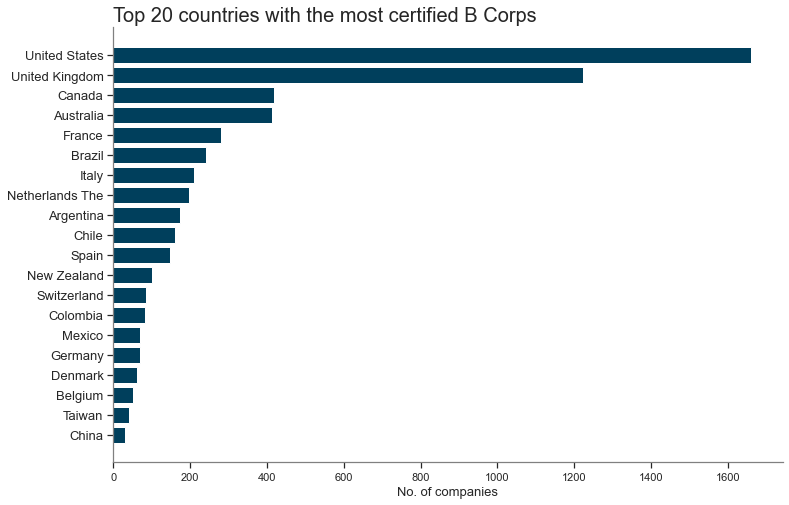

In [42]:
# horizontal bar plot top 20 countries by number of certified companies
plt.figure(figsize = (12,8))

country_df = country_df.sort_values(by = "company_count")

plt.barh(country_df.index, country_df.company_count, color = "#003f5c")
plt.title("Top 20 countries with the most certified B Corps", loc = "left", fontsize = 20)
plt.xlabel("No. of companies", fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

The United States have the most certified B Corps: 1659.

#### Which cities have the most certified B Corps?

In [43]:
# create data frame city_df
city_df = bcorp_df[["city", "company_count"]].groupby(["city"]).sum().sort_values("company_count",ascending = False).head(20)

In [44]:
city_df

,company_count
city,
London,574
Paris,124
Portland,118
São Paulo,113
Santiago,94
Amsterdam,91
New York,83
Melbourne,82
Toronto,75


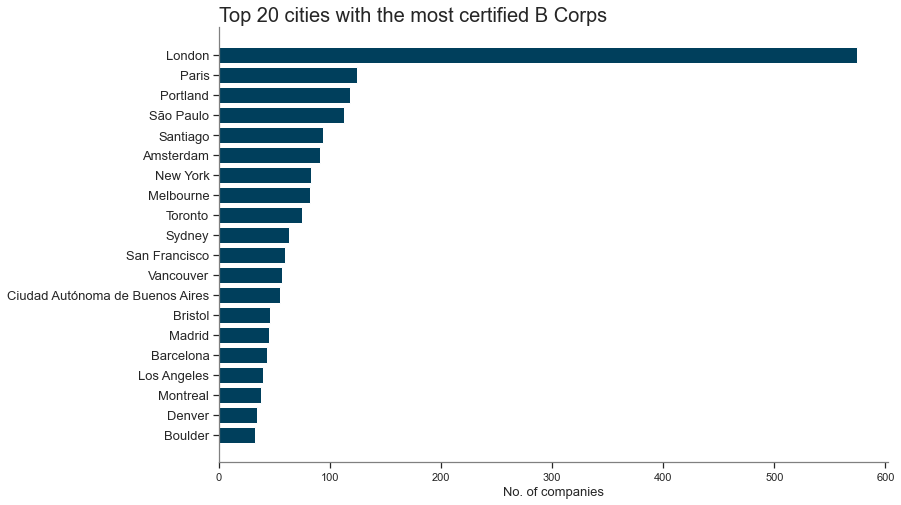

In [45]:
# top 20 cities
plt.figure(figsize = (12,8))

city_df = city_df.sort_values(by = "company_count")

plt.barh(city_df.index, city_df.company_count, color = "#003f5c")

plt.title("Top 20 cities with the most certified B Corps", loc = "left", fontsize = 20)
plt.xlabel("No. of companies", fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

574 certified B Corp companies operate in London.

#### Number of certified B Corps by size

In [46]:
# create data frame size_df
size_df = bcorp_df.groupby("size").agg({"company_count":"sum"})

# define order by size increasing
order = ["0","1-9","10-49","50-249","250-999","1000+"]

# custom order index
size_df = size_df.reindex(order)

In [47]:
size_df

,company_count
size,
0,559
1-9,2082
10-49,2211
50-249,878
250-999,292
1000+,106


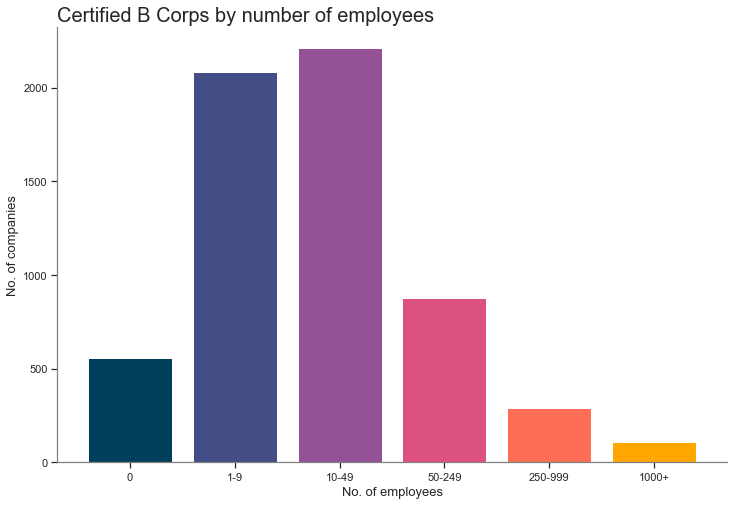

In [48]:
# bar plot
plt.figure(figsize = (12,8))

plt.bar(size_df.index, size_df.company_count, color = ["#003f5c", "#444e86","#955196", "#dd5182","#ff6e54","#ffa600"])

plt.title("Certified B Corps by number of employees", loc = "left", fontsize = 20)
plt.xlabel("No. of employees", fontsize = 13)
plt.ylabel("No. of companies", fontsize = 13)

plt.show()

70% of the certified B Corps are small companies with less than 50 employees.

### Scores analysis

#### Overall score distribution

In [49]:
# count how often a certain score occurs
bcorp_df.overall_score.value_counts()

80.1     63
80.2     62
80.3     55
80.0     55
80.9     52
         ..
160.5     1
129.8     1
136.5     1
132.1     1
143.2     1
Name: overall_score, Length: 639, dtype: int64

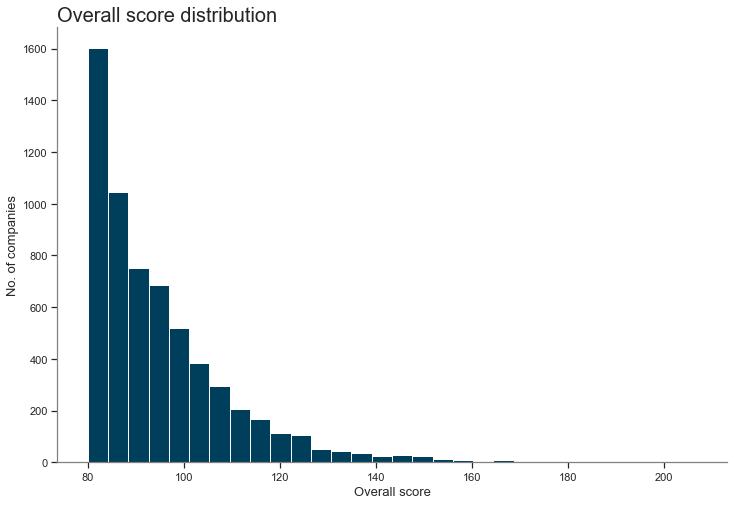

In [50]:
# overall score histogram 
plt.figure(figsize = (12,8))

plt.hist(bcorp_df.overall_score, bins = 30, color = "#003f5c", edgecolor = "white")

plt.title("Overall score distribution", loc = "left", fontsize = 20)
plt.xlabel("Overall score", fontsize = 13)
plt.ylabel("No. of companies", fontsize = 13)

plt.show()

Most companies have an overall score between 80-90.

#### Which companies have the highest overall score?

In [51]:
# create top_companies data frame for top 10 highest score
top_companies = bcorp_df.sort_values("overall_score", ascending = False).head(10)
top_companies

,company_id,company_name,date_first_certified,date_last_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score,year_first_certified,quarter_first_certified,company_count
5865,001C0000014xUPqIAM,Dr. Bronner's,2015-09-25,2022-09-16 22:32:50.068000+00:00,Personal care products,Manufactured Goods,United States,California,Vista,Manufacturing,250-999,206.7,83.3,4.0,75.3,15.3,28.3,0.0,0.0,0.0,0.0,0.3,2015,2015Q3,1
4195,001C0000015ohK9IAI,"South Mountain Company, Inc.",2008-06-11,2021-06-23 20:30:05.186000+00:00,Design & building,"Real estate, design & building",United States,Massachusetts,West Tisbury,Service with Significant Environmental Footprint,10-49,184.1,56.8,1.8,36.9,16.6,66.4,2.9,0.0,2.0,0.0,0.4,2008,2008Q2,1
2775,001C000001de8H6IAI,African Clean Energy BV,2018-02-23,2021-07-07 13:47:29.102000+00:00,Solar power generation,"Energy, Heating & Cooling",Netherlands The,Noord-Holland,Amsterdam,Manufacturing,50-249,179.8,15.6,61.5,27.4,13.0,55.3,1.5,0.0,0.2,0.0,5.0,2018,2018Q1,1
2958,0013b00001tBOHbAAO,OXIOUS BV,2022-04-20,2022-04-20 22:12:17.796000+00:00,Textiles,Wholesale,Netherlands The,South Holland,Rotterdam,Wholesale/Retail,0,173.0,110.0,2.9,35.4,20.2,NaN,4.3,0.0,0.0,0.0,NaN,2022,2022Q2,1
4108,001C000001a20hmIAA,Nourish Cold Pressed Juice,2017-12-05,2021-07-29 16:05:10.817000+00:00,Food products,Manufactured Goods,United States,Pennsylvania,Kennett Square,Manufacturing,0,170.5,115.2,3.5,33.2,17.5,NaN,0.0,0.0,0.9,0.0,NaN,2017,2017Q4,1
843,001C000001Xdz07IAB,Nia Impact Capital,2017-09-26,2022-03-11 16:46:08.969000+00:00,Investment advising,Financial & insurance activities,United States,California,Oakland,Service with Minor Environmental Footprint,1-9,169.4,38.4,64.4,7.5,20.5,32.9,0.0,0.0,5.5,0.0,0.0,2017,2017Q3,1
3377,001C000000rp2mlIAA,"Mightybytes, Inc.",2011-07-28,2022-03-01 07:12:18.888000+00:00,Web portals,"Information, communication & technology",United States,Illinois,Chicago,Service with Minor Environmental Footprint,1-9,168.6,47.4,30.4,31.6,22.3,32.9,0.0,0.0,1.1,0.0,2.7,2011,2011Q3,1
3944,001C000001InQAlIAN,Global Prairie,2015-03-02,2021-04-29 15:24:28.838000+00:00,Advertising & market research,Professional & technical services,United States,Missouri,Kansas City,Service with Minor Environmental Footprint,50-249,168.4,41.7,14.1,13.7,23.6,71.2,3.8,0.0,0.0,0.0,0.0,2015,2015Q1,1
3500,001C000001Q2nlfIAB,soulproducts GmbH,2015-12-18,2023-01-18 16:51:29.935000+00:00,Other/general wholesale trade,Wholesale,Germany,Berlin,Berlin,Wholesale/Retail,10-49,167.5,50.8,4.7,42.5,7.9,55.8,0.0,0.0,0.0,0.0,5.5,2015,2015Q4,1
754,001C000001Q4zAEIAZ,MOVIN,2016-02-10,2022-05-18 13:18:10.650000+00:00,Apparel,Retail,Brazil,Rio de Janeiro,Rio de Janeiro,Wholesale/Retail,1-9,166.4,30.3,4.5,90.8,15.5,16.4,3.4,0.0,1.0,0.0,4.2,2016,2016Q1,1


Dr. Bronner's, a personal care product, manufactured goods company from the US has the highest overall score: 206.7, followed by South Mountain Company, Inc. (real estate, design & building, US) and African Clean Energy BV (energy, heating & cooling, NL) with overall scores of 184.1 and 179.8 respectively.

#### Overall score distribution by company size

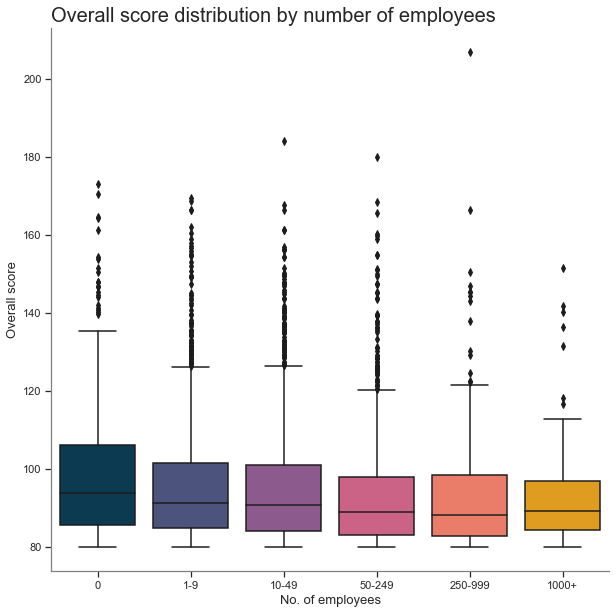

In [52]:
# size and overall score boxplot ordered by size group
plt.figure(figsize = (10,10))

# assign color palette by size
my_palette = ["#003f5c", "#444e86","#955196", "#dd5182","#ff6e54","#ffa600"]
size_order = ["0","1-9","10-49","50-249","250-999","1000+"]

sns.boxplot(data = bcorp_df,
            x = "size",
            y = "overall_score",
            palette = my_palette,
            order = size_order)

plt.title("Overall score distribution by number of employees", loc = "left", fontsize = 20)
plt.xlabel("No. of employees", fontsize = 13)
plt.ylabel("Overall score", fontsize = 13)
plt.show()

The size of the company doesn't really influence the overall score.

### Industry and sector analysis by overall score

#### Median overall score by industry category

In [53]:
# median overall score by industry category
industrycat_df = bcorp_df.groupby("industry_category").agg({"overall_score" : "median"})

In [54]:
industrycat_df.sort_values("overall_score", ascending = False)

,overall_score
industry_category,
"Energy, Heating & Cooling",109.90
Water & Sewerage,101.10
Financial & insurance activities,95.65
Human health & social work,94.30
Waste Management & Recycling,94.10
Energy,93.70
Construction,93.50
Education,93.10
"Real estate, design & building",92.50


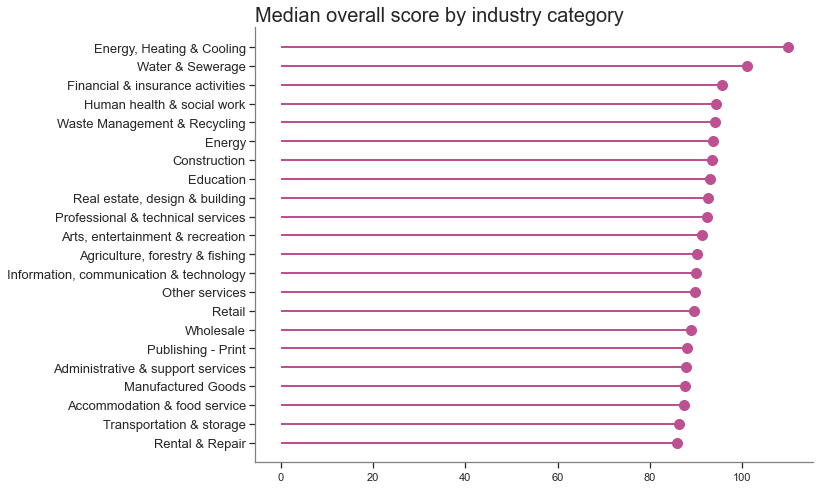

In [55]:
# lollipop plot
plt.figure(figsize = (10,8))

industrycat_df = industrycat_df.sort_values("overall_score")

plt.hlines(y = industrycat_df.index, xmin = 0, xmax = industrycat_df.overall_score, linewidth = 2, color = "#bc5090")
plt.plot(industrycat_df.overall_score, industrycat_df.index, "o", markersize = 10, color = "#bc5090")

plt.title("Median overall score by industry category", loc = "left", fontsize = 20)
plt.yticks(fontsize = 13)

plt.show()

The Energy, Heating & Cooling industry has the highest median overall score of 109.9.

#### Sector vs industry category vs industry

**Note**: 'industry_category' is a more general, higher level categorization than 'industry'. 'industry' describes the company's principal product in more details, therefor there are significantly more unique values in the 'industry' column. The broadest category is sector.

sector > industry_category > industry

In [56]:
# count unique values in sector
bcorp_df["sector"].nunique()

6

In [57]:
# count unique values in industry_category
bcorp_df["industry_category"].nunique()

22

In [58]:
# count unique values in industry
bcorp_df["industry"].nunique()

159

#### Top 20 industries by median overall score

In [59]:
# median overall score by industry and industry category, top 20
industry_df = bcorp_df.groupby("industry").agg({"overall_score" : "median"}).sort_values("overall_score", ascending = False).head(20)

In [60]:
industry_df

,overall_score
industry,
Wind power generation,154.90
Non-residential social work,122.00
Microfinance - Emerging Markets,115.80
Solar power generation,115.50
Steam & air conditioning,109.90
Other power generation,107.10
Books or other media,103.35
Management consultant - for-profits,103.00
Deposit bank - Developed Markets,102.80


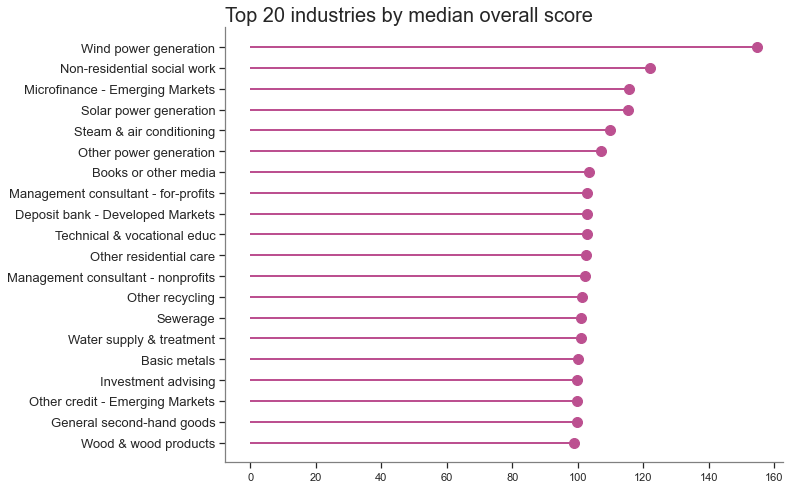

In [61]:
# top industries lollipop
plt.figure(figsize = (10,8))

top_industries = industry_df.sort_values("overall_score")

plt.hlines(y = top_industries.index, xmin = 0, xmax = top_industries.overall_score, linewidth = 2, color = "#bc5090")
plt.plot(top_industries.overall_score, top_industries.index, "o", markersize = 10, color = "#bc5090")

plt.title("Top 20 industries by median overall score", loc = "left", fontsize = 20)
plt.yticks(fontsize = 13)

plt.show()

Wind power generation industry has the highest median overall score of 154.9.

#### Overall score distribution by sector

In [62]:
# group by sector and aggregate by overall score median, to be used to define order in boxplot
bcorp_df.groupby("sector").agg({"overall_score" : "median",}).sort_values("overall_score", ascending = False)

,overall_score
sector,
Service with Minor Environmental Footprint,92.20
Service,90.35
Service with Significant Environmental Footprint,89.65
Agriculture/Growers,89.60
Wholesale/Retail,89.50
Manufacturing,88.20


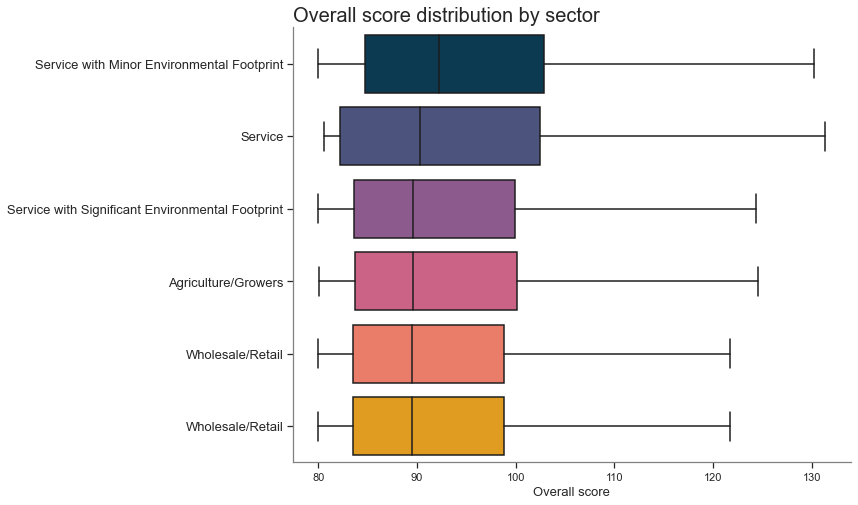

In [63]:
# overall score distribution by sector boxplot without outliers, using showfliers = False
plt.figure(figsize = (10,8))

my_palette = ["#003f5c", "#444e86","#955196", "#dd5182","#ff6e54","#ffa600"]

# define order manually based on the above: by median overall score descending
sector_order = ["Service with Minor Environmental Footprint", "Service", "Service with Significant Environmental Footprint", "Agriculture/Growers", "Wholesale/Retail", "Wholesale/Retail"]


sns.boxplot(data = bcorp_df,
            x = "overall_score",
            y = "sector",
           palette = my_palette,
           showfliers = False,
           order = sector_order)

plt.title("Overall score distribution by sector", loc = "left", fontsize = 20)
plt.xlabel("Overall score", fontsize = 13)
plt.ylabel("")
plt.yticks(fontsize = 13)
plt.show()

### First certification year

#### How many companies got certified each year?

In [64]:
# number of companies by year first certified
firstcert_df = bcorp_df[["year_first_certified", "company_count"]].groupby(["year_first_certified"]).sum()

In [65]:
firstcert_df

,company_count
year_first_certified,
2007,23
2008,20
2009,11
2010,31
2011,49
2012,78
2013,110
2014,172
2015,233


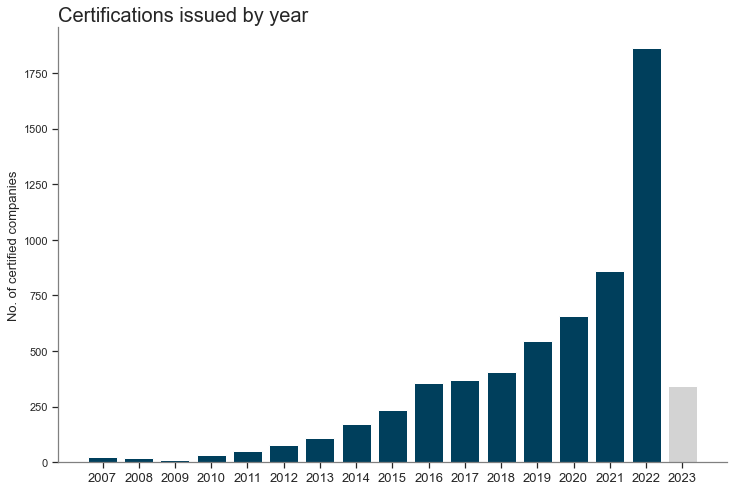

In [66]:
# first certified year bar plot with 2023 colored in grey as it's Q1 only
plt.figure(figsize = (12,8))

years = firstcert_df.index
counts = firstcert_df.company_count
colors = ["lightgrey" if i == "2023" else "#003f5c" for i in years]

plt.bar(years, counts, color = colors)
plt.title("Certifications issued by year", loc = "left", fontsize = 20)
plt.xlabel("")
plt.xticks(fontsize = 13)
plt.ylabel("No. of certified companies", fontsize = 13)
plt.show()

#### Overall score by first certification year

In [67]:
# create data frame to show median, min, max overall score by first certified year
median_year_score = bcorp_df.groupby(["year_first_certified"]).agg({"overall_score": "median"})
min_year_score = bcorp_df.groupby(["year_first_certified"]).agg({"overall_score": "min"})
max_year_score = bcorp_df.groupby(["year_first_certified"]).agg({"overall_score": "max"})

In [68]:
# try one to see if successful
median_year_score

,overall_score
year_first_certified,
2007,110.40
2008,108.60
2009,113.20
2010,97.60
2011,103.00
2012,99.00
2013,93.70
2014,99.05
2015,97.60


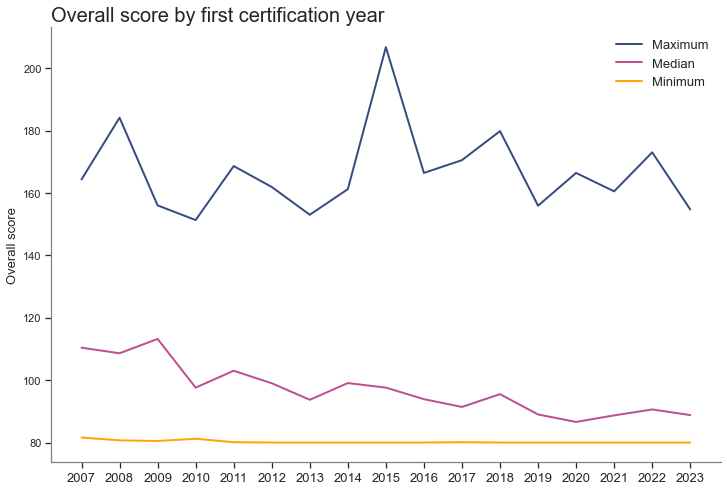

In [69]:
# line chart for overall score min, max, median
plt.figure(figsize = (12,8))

sns.lineplot(data = max_year_score, x = "year_first_certified", y = "overall_score", linewidth = 2, color = "#374c80", label = "Maximum")
sns.lineplot(data = median_year_score, x = "year_first_certified", y = "overall_score", linewidth = 2, color = "#bc5090", label = "Median")
sns.lineplot(data = min_year_score, x = "year_first_certified", y = "overall_score", linewidth = 2, color = "#ffa600", label = "Minimum")

plt.title("Overall score by first certification year", loc = "left", fontsize = 20)
plt.xlabel("")
plt.xticks(fontsize = 13)
plt.ylabel("Overall score", fontsize = 13)

plt.legend(fontsize = 13, frameon = False)
plt.show()

### First certification by quarter

#### How many companies got certified on a quarterly basis in the past few years?

In [70]:
# create data frame for quarters after 2019
quarter_firstcert = bcorp_df.loc[bcorp_df.quarter_first_certified >= "2019Q1"].groupby(["quarter_first_certified"]).agg({"company_count": "sum"})

In [71]:
quarter_firstcert

,company_count
quarter_first_certified,
2019Q1,94
2019Q2,147
2019Q3,152
2019Q4,153
2020Q1,106
2020Q2,158
2020Q3,190
2020Q4,205
2021Q1,212


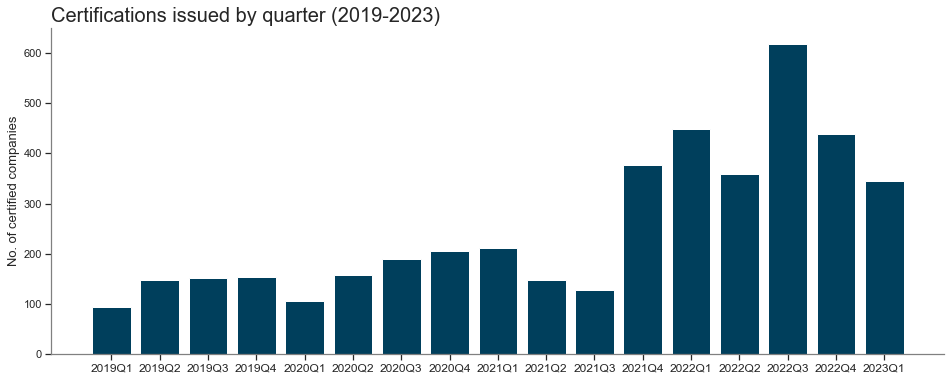

In [72]:
# first certified quarter bar plot
plt.figure(figsize = (16,6))

plt.bar(quarter_firstcert.index, quarter_firstcert.company_count, color = "#003f5c")
plt.title("Certifications issued by quarter (2019-2023)", loc = "left", fontsize = 20)
plt.xlabel("")
plt.xticks(fontsize = 12)
plt.ylabel("No. of certified companies", fontsize = 13)
plt.show()

### B Corps in Switzerland

In [73]:
# create data frame for Swiss B Corps instead of using a mask
ch_bcorp = bcorp_df.loc[bcorp_df.country == "Switzerland"]

In [74]:
ch_bcorp.shape

(86, 25)

There are 86 Certified B Corps in Switzerland.

#### Swiss B Corps by overall score

In [75]:
# look at the companies with the highest scores
ch_bcorp.sort_values("overall_score", ascending = False).head()

,company_id,company_name,date_first_certified,date_last_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score,year_first_certified,quarter_first_certified,company_count
1543,0013b00001qHEeBAAW,Doing Business Doing Good,2022-02-07,2022-02-07 00:19:07.878000+00:00,Other personal services,Other services,Switzerland,Canton of Geneva,Carouge,Service with Minor Environmental Footprint,0,161.2,78.5,43.1,10.5,22.0,NaN,0.0,0.0,7.0,0.0,NaN,2022,2022Q1,1
2288,0013b00001uNw6kAAC,KAMPOS,2021-11-25,2021-11-25 10:58:56.326000+00:00,Textiles,Manufactured Goods,Switzerland,canton of Zürich,Zurich,Manufacturing,1-9,158.8,48.7,5.0,57.3,15.8,20.9,4.4,0.0,1.4,0.0,5.0,2021,2021Q4,1
1885,001C000001mVzTwIAK,AdvantiKA GmbH,2021-07-07,2021-07-07 17:07:06.629000+00:00,Management consultant - for-profits,Professional & technical services,Switzerland,Zürich,Zurich,Service with Minor Environmental Footprint,0,120.6,58.3,39.6,1.4,16.9,NaN,3.1,0.0,1.1,0.0,NaN,2021,2021Q3,1
6061,0013b00001vP5FVAA0,Enabling Qapital AG,2022-09-22,2022-09-22 06:56:17.399000+00:00,Microfinance - Emerging Markets,Financial & insurance activities,Switzerland,Canton of Zug,Zug,Service with Minor Environmental Footprint,10-49,120.4,12.2,40.9,14.1,18.3,32.1,2.2,0.0,0.4,0.0,0.0,2022,2022Q3,1
1502,0013b00001tAPb9AAG,SmartHelio,2021-12-08,2021-12-08 05:18:17.347000+00:00,Solar panel installation,Energy,Switzerland,Canton of Vaud,Lausanne,Service with Significant Environmental Footprint,1-9,116.8,20.5,4.7,35.8,16.1,29.4,1.4,0.0,5.7,0.0,2.7,2021,2021Q4,1


#### Swiss B Corps by industry

In [76]:
# Swiss B Corps by industry and median score
ch_bcorp.groupby("industry").agg({"company_count": "sum","overall_score": "median"}).sort_values("company_count", ascending = False).head(10)

,company_count,overall_score
industry,,
Investment advising,7,100.00
Food products,5,91.20
Management consultant - for-profits,5,90.10
Other info service activities,4,83.75
"Other professional, scientific & tech",4,98.05
Personal care products,4,97.90
Agricultural Processing,3,93.20
Textiles,3,89.60
Beverages,3,84.30


#### B Corps in Zürich

In [77]:
# B Corps Zürich- attention: discrepancies in spelling
ch_bcorp.loc[(ch_bcorp.city == "Zurich") | (ch_bcorp.city == "Zürich")].sort_values("overall_score", ascending = False)

,company_id,company_name,date_first_certified,date_last_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score,year_first_certified,quarter_first_certified,company_count
2288,0013b00001uNw6kAAC,KAMPOS,2021-11-25,2021-11-25 10:58:56.326000+00:00,Textiles,Manufactured Goods,Switzerland,canton of Zürich,Zurich,Manufacturing,1-9,158.8,48.7,5.0,57.3,15.8,20.9,4.4,0.0,1.4,0.0,5.0,2021,2021Q4,1
1885,001C000001mVzTwIAK,AdvantiKA GmbH,2021-07-07,2021-07-07 17:07:06.629000+00:00,Management consultant - for-profits,Professional & technical services,Switzerland,Zürich,Zurich,Service with Minor Environmental Footprint,0,120.6,58.3,39.6,1.4,16.9,NaN,3.1,0.0,1.1,0.0,NaN,2021,2021Q3,1
2068,001C000001Ns7P3IAJ,Globalance Bank,2015-10-09,2022-05-25 13:34:29.104000+00:00,Investment advising,Financial & insurance activities,Switzerland,Zurich,Zurich,Service with Minor Environmental Footprint,10-49,111.9,11.3,51.9,6.1,19.2,17.9,1.6,0.0,0.0,0.0,3.6,2015,2015Q4,1
654,0013b00001uPM9JAAW,Farmy AG,2022-05-11,2022-05-11 10:12:54.601000+00:00,Food products,Retail,Switzerland,Zurich,Zurich,Wholesale/Retail,250-999,103.6,40.1,4.2,28.9,14.5,12.9,0.0,0.0,0.0,0.0,2.7,2022,2022Q2,1
1613,0013b00001vMhNVAA0,MA people GmbH,2022-03-14,2022-03-14 00:10:34.141000+00:00,Management consultant - for-profits,Professional & technical services,Switzerland,canton of Zürich,Zurich,Service with Minor Environmental Footprint,1-9,90.1,18.1,22.7,3.8,15.6,16.6,2.7,0.0,3.4,0.0,6.9,2022,2022Q1,1
3825,0013b00001tADwBAAW,Fair Voyage,2022-06-02,2022-06-02 14:30:24.385000+00:00,Travel agency & related,Administrative & support services,Switzerland,canton of Zürich,Zurich,Service with Minor Environmental Footprint,1-9,86.0,25.4,4.7,3.1,19.1,23.4,2.1,0.0,2.8,0.0,4.9,2022,2022Q2,1
4404,0013b00001qFehOAAS,Reform GmbH,2021-11-03,2021-11-03 10:10:10.966000+00:00,Arts & entertainment,"Arts, entertainment & recreation",Switzerland,canton of Zürich,Zurich,Service with Minor Environmental Footprint,0,85.5,40.0,7.1,13.5,17.1,NaN,5.4,0.0,2.2,0.0,NaN,2021,2021Q4,1
2959,001C000001iuJlpIAE,Evian Volvic Suisse,2020-05-13,2020-05-13 09:05:53.686000+00:00,Beverages,Wholesale,Switzerland,Zürich,Zürich,Wholesale/Retail,50-249,81.3,12.6,3.6,24.2,14.4,20.5,1.3,0.0,0.0,0.0,4.4,2020,2020Q2,1


There are 8 B Corps operating in Zürich.

### Observations

- The United States have the most certified B Corps: 1659.
- 574 certified B Corp companies operate in London.
- 70% of the certified B Corps are small companies with less than 50 employees.
- Most companies have an overall score between 80-90.
- Dr. Bronner's, a personal care product, manufactured goods company from the US has the highest overall score: 206.7.
- The size of the company doesn't really influence the overall score.
- The Energy, Heating & Cooling industry category has the highest median overall score of 109.9.
- Wind power generation industry has the highest median overall score of 154.9.
- Most certifications were issued in 2022, specifically in 2022 Q3.
- There are 86 certified B Corps in Switzerland, mostly in the Investment advising, Food Products and Management consultants for profits industries.
- 8 B Corps are located in Zürich.

### Visualizations created

- Top 20 countries with the most certified B Corps (horizontal bar plot)
- Top 20 cities with the most certified B Corps (horizontal bar plot)
- Certified B Corps by number of employees (bar plot)
- Overall score distribution (histogram)
- Overall score distribution by company size (boxplot)
- Median overall socre by industry category (lollipop chart)
- Top 20 industries by median overall score (lollipop chart)
- Overall score distribution by sector (boxplot)
- Certifications issued by year (bar plot)
- Overall score by first certification year (line plot)
- Certifications issued by quarter (2019-2023) (bar plot)

### Ideas for further analysis

- Dive deeper into a specific industry or country
- Combine dataset with other datasets from B Lab, e.g. Public B Corps

## Variables in this notebook

In [78]:
%whos

Variable            Type         Data/Info
------------------------------------------
bcorp_backup        DataFrame                  company_id <...>n[6130 rows x 22 columns]
bcorp_df            DataFrame                  company_id <...>n[6128 rows x 25 columns]
ch_bcorp            DataFrame                  company_id <...>n\n[86 rows x 25 columns]
city_df             DataFrame                             <...>                      574
colors              list         n=17
country_df          DataFrame                     company_<...>d States             1659
counts              Series       year_first_certified\n200<...>mpany_count, dtype: int64
custom_params       dict         n=3
date                type         <class 'datetime.date'>
datetime            type         <class 'datetime.datetime'>
firstcert_df        DataFrame                          com<...>                      345
industry_df         DataFrame                             <...>                    98.80
industryc

## Data storage

Write transformed data frame in a new .csv file.

In [79]:
#bcorp_df.to_csv("bcorp_df.csv", index = False)

## Related projects

Interactive visualizations in Tableau using the cleaned and transformed dataset:

- [Certified B Corporations](https://public.tableau.com/app/profile/anna8476/viz/CertifiedBCorporations/Dashboard1) - jitter plot showing all certified B Corps by size with the option to filter by country or industry category

- [Certified B Corporations accross industries](https://public.tableau.com/app/profile/anna8476/viz/CertifiedBCorporationsDrillDown/Dashboard1) - bar plot with drill down option from industry category to industry by number of companies or by median overall score

## References

- B Corp website: https://www.bcorporation.net/en-us
- B Corp certification https://www.bcorporation.net/en-us/certification
- The original dataset by B Lab on *data.world*: https://data.world/blab/b-corp-impact-data
- The original data dictionary: https://data.world/blab/b-corp-impact-data/workspace/data-dictionary
- B Lab SQL query tutorial for *data.world*: https://kb.bimpactassessment.net/support/solutions/articles/43000570530-using-sql-in-b-corp-impact-data-tutorial-
- B Corp Project Description and Notes: https://github.com/zhaw-education/student-repo-2023r1-annamandoki/blob/main/project/B_Corp_Project_Description_Notes.md